In [5]:
import re
import os
import time
import random
import numpy as np
from pandas import Series
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from fbprophet import Prophet
import itertools
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [6]:
explore=pd.read_csv('daily09-19',index_col='date')
explore.index=pd.DatetimeIndex(explore.index)
nasa=pd.read_csv('nasa09-19',index_col='date')
nasa.index=pd.DatetimeIndex(nasa.index)
spacex=pd.read_csv('spacex09-19',index_col='date')
spacex.index=pd.DatetimeIndex(spacex.index)
marscol=pd.read_csv('marscol09-19',index_col='date')
marscol.index=pd.DatetimeIndex(marscol.index)
aliens=pd.read_csv('aliens09-19',index_col='date')
aliens.index=pd.DatetimeIndex(aliens.index)
planets=pd.read_csv('aliens09-19',index_col='date')
planets.index=pd.DatetimeIndex(planets.index)

In [7]:
merch=pd.read_csv('spacemerch09-19',index_col='date')
merch.index=pd.DatetimeIndex(merch.index)
merchandise=pd.read_csv('spacemerchandise09-19',index_col='date')
merchandise.index=pd.DatetimeIndex(merchandise.index)

In [4]:
aliens

,aliens_unscaled,aliens_monthly,isPartial,scale,aliens
date,,,,,
2009-01-01,76,29.0,False,0.29,22.04
2009-01-02,60,29.0,NaN,0.29,17.40
2009-01-03,65,29.0,NaN,0.29,18.85
2009-01-04,96,29.0,NaN,0.29,27.84
2009-01-05,81,29.0,NaN,0.29,23.49
...,...,...,...,...,...
2019-01-27,66,34.0,NaN,0.34,22.44
2019-01-28,77,34.0,NaN,0.34,26.18
2019-01-29,66,34.0,NaN,0.34,22.44


In [8]:
data={'nasa':{'data':nasa,'col':'nasa'},
      'explore':{'data':explore,'col':'space exploration'},
      'spacex':{'data':spacex,'col':'spacex'},
      'marscol':{'data':marscol,'col':'mars colonization'},
      'aliens':{'data':aliens,'col':'aliens'},
      'merch':{'data':merch, 'col':'nasa merch'},
      'merchandise':{'data':merch, 'col':'nasa merchandise'}
     }
col='space exploration'



In [89]:
df=data['']['data']
col=data['nasa']['col']
year_groups = df[col].resample('M',how='mean').groupby(pd.Grouper(freq ='A'))

In [97]:
df=pd.DataFrame()
using='explore'
dat=data[using]['data']
col=data[using]['col']
df['y']=dat[col].loc[:'2018-01-31']
df=df.rename_axis('ds')
df.reset_index(inplace=True)

In [98]:
m = Prophet(daily_seasonality=True)
m.fit(df)

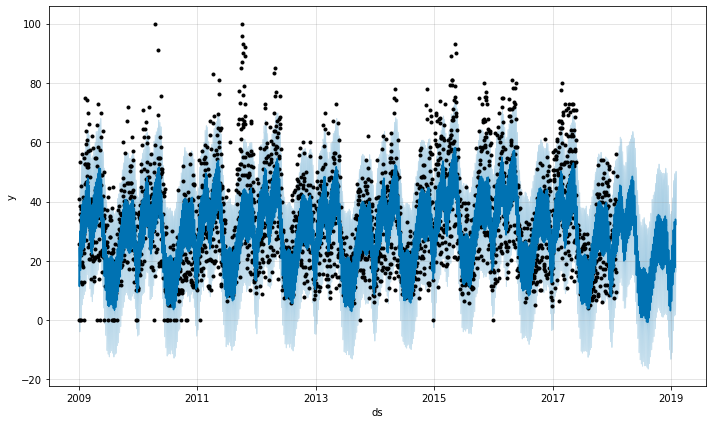

In [99]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
# forecast = m.predict(future)
# fig = m.plot_components(forecast)

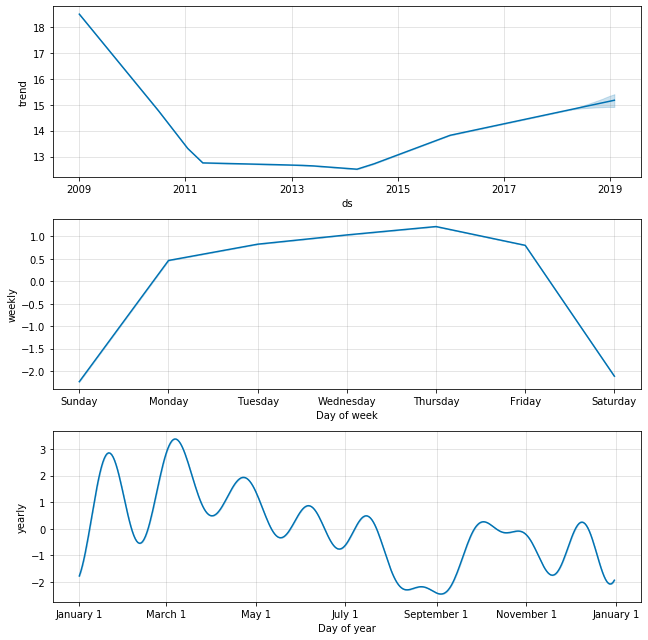

In [93]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [79]:
aliens.loc['2019-01-29']['aliens']

22.44